In [14]:
import pandas as pd
from ggplot import *

In [4]:
df_hour = pd.read_csv('data/steps.csv', parse_dates=[0,1], names=['start_time', 'steps'], usecols=[0,2], skiprows=1, index_col=0)

In [7]:
df_hour.steps = df_hour.steps.apply(lambda x: int(float(x)))

In [29]:
df_daily = pd.DataFrame()
df_daily['steps'] = df_hour.steps.resample('D').sum()
df_daily['step_mean'] = df_hour.steps.resample('D').mean()
df_daily.head()

,steps,step_mean
start_time,,
2015-10-23,4165,694.166667
2015-10-24,8314,346.416667
2015-10-25,2747,114.458333
2015-10-26,6472,269.666667
2015-10-27,4946,206.083333


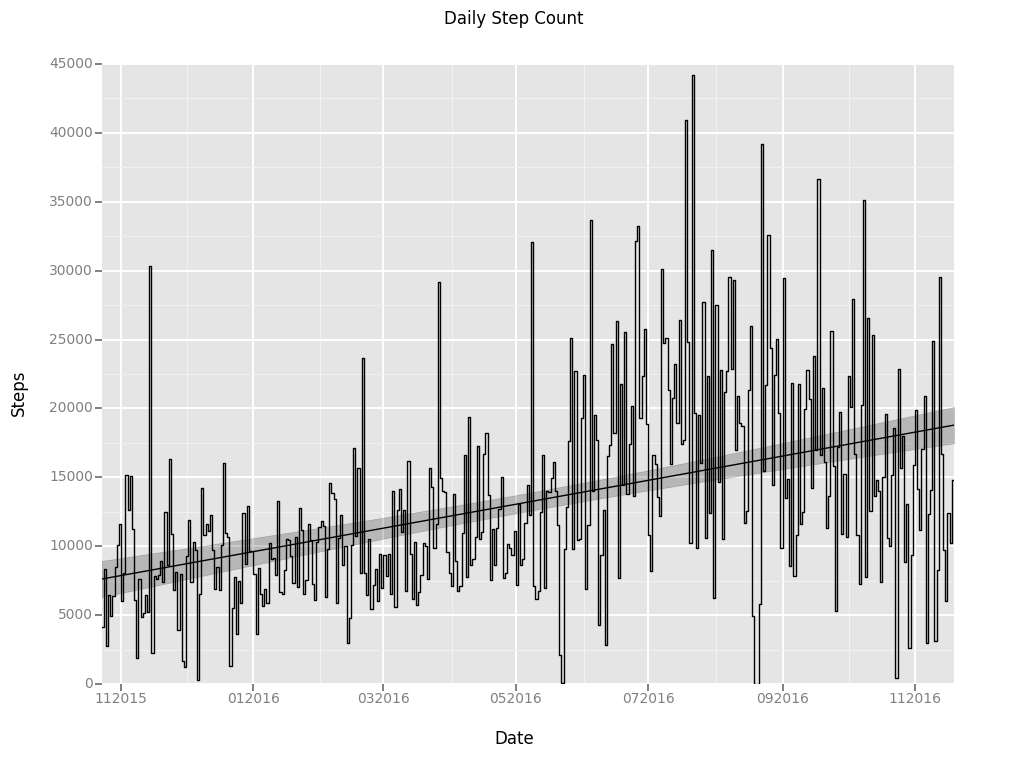

<ggplot: (-9223372036562654043)>


In [28]:
# plot daily step counts
p = ggplot(df_daily, aes(x='__index__', y='steps')) + \
    geom_step() + \
    stat_smooth() + \
    scale_x_date(labels="%m%Y") + \
    ggtitle('Daily Step Count') + \
    xlab('Date') + \
    ylab('Steps')

print(p)


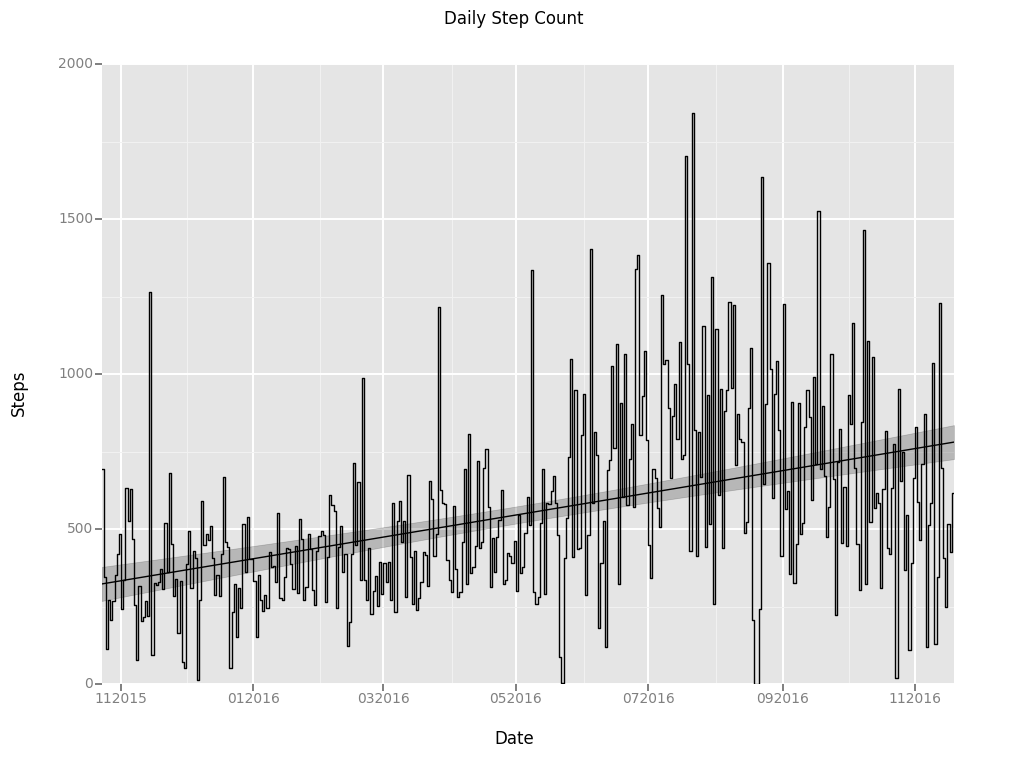

<ggplot: (291874715)>


In [30]:
# plot daily mean step count
p = ggplot(df_daily, aes(x='__index__', y='step_mean')) + \
    geom_step() + \
    stat_smooth() + \
    scale_x_date(labels="%m%Y") + \
    ggtitle('Daily Step Count') + \
    xlab('Date') + \
    ylab('Steps')

print(p)

In [32]:
# Resample to weekly and monthly counts
df_weekly = pd.DataFrame()
df_monthly = pd.DataFrame()

df_weekly['steps'] = df_hour.steps.resample('W').sum()
df_weekly['step_mean'] = df_hour.steps.resample('W').mean()

df_monthly['steps'] = df_hour.steps.resample('M').sum()
df_monthly['step_mean'] = df_hour.steps.resample('M').mean()

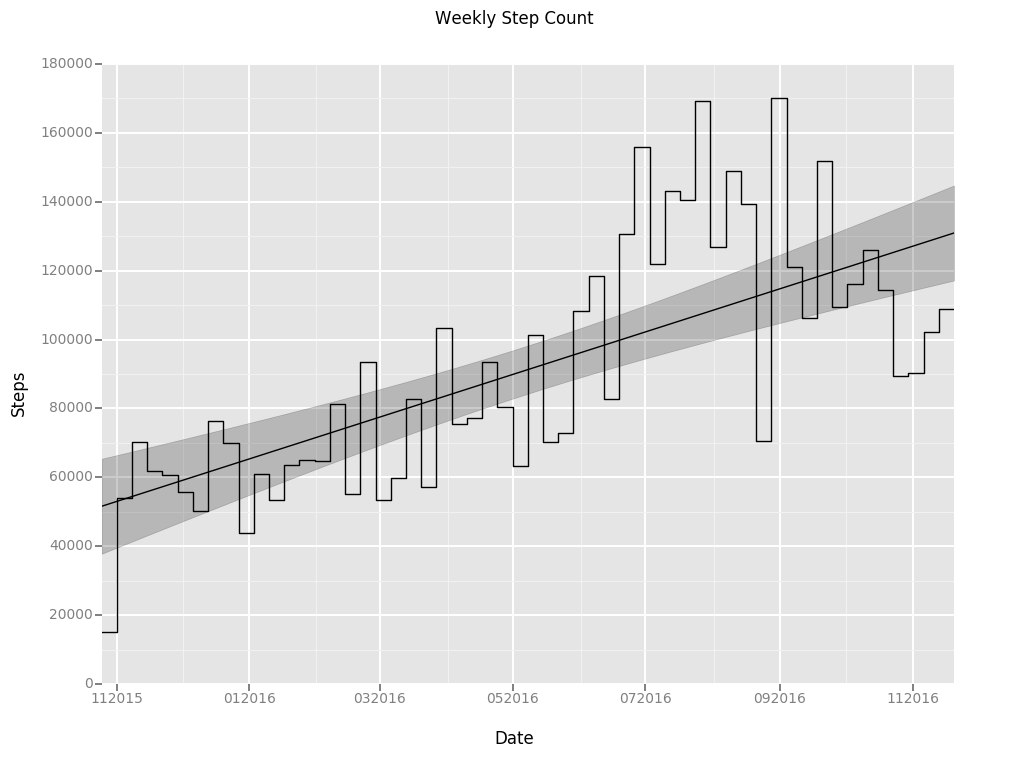

<ggplot: (292202304)>


In [38]:
# plot weekly
w_p = ggplot(df_weekly, aes(x='__index__', y='steps')) + \
        geom_step() + \
        stat_smooth() + \
        scale_x_date(labels='%m%Y') + \
        ggtitle('Weekly Step Count') + \
        xlab('Date') + \
        ylab('Steps')

print(w_p)

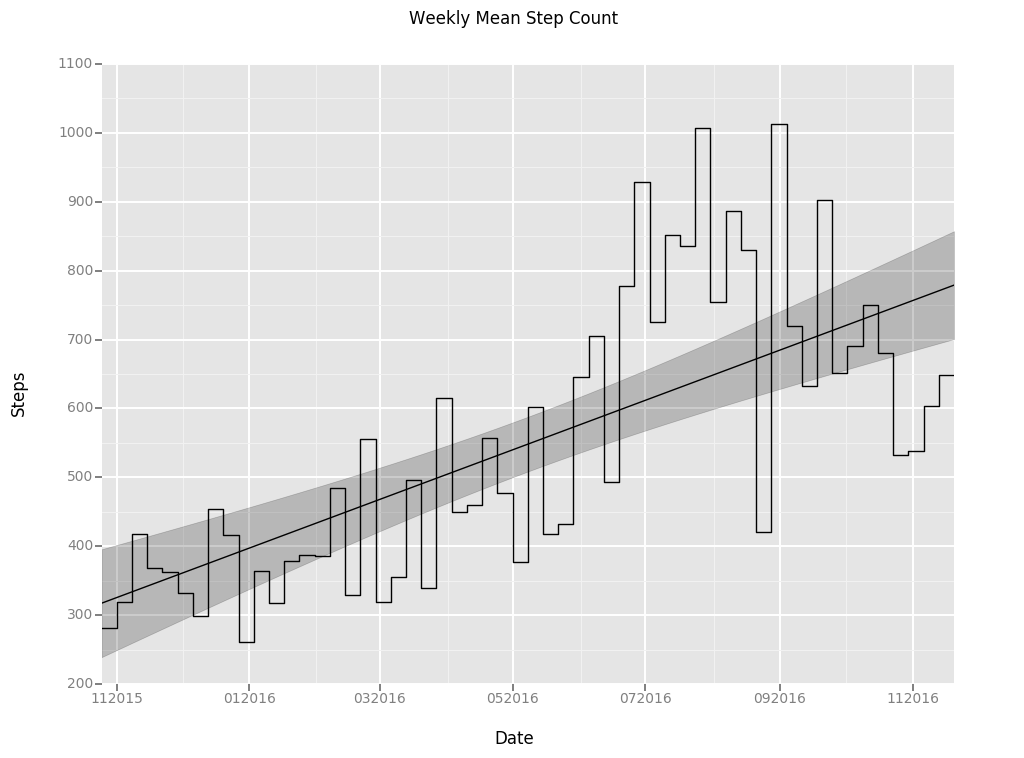

<ggplot: (-9223372036565739474)>


In [40]:
# plot weeklymean
w_p = ggplot(df_weekly, aes(x='__index__', y='step_mean')) + \
        geom_step() + \
        stat_smooth() + \
        scale_x_date(labels='%m%Y') + \
        ggtitle('Weekly Mean Step Count') + \
        xlab('Date') + \
        ylab('Steps')

print(w_p)

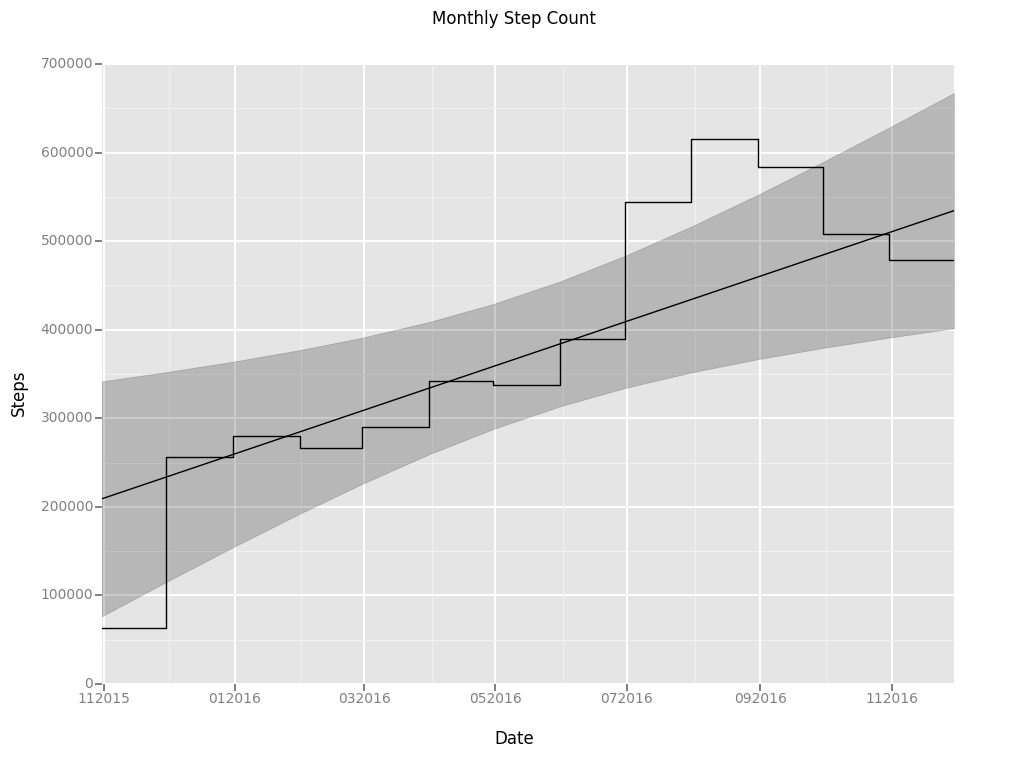

<ggplot: (291985647)>


In [39]:
# plot monthly steps
m_p = ggplot(df_monthly, aes(x='__index__', y='steps')) + \
        geom_step() + \
        stat_smooth() + \
        scale_x_date(labels='%m%Y') + \
        ggtitle('Monthly Step Count') + \
        xlab('Date') + \
        ylab('Steps')

print(m_p)

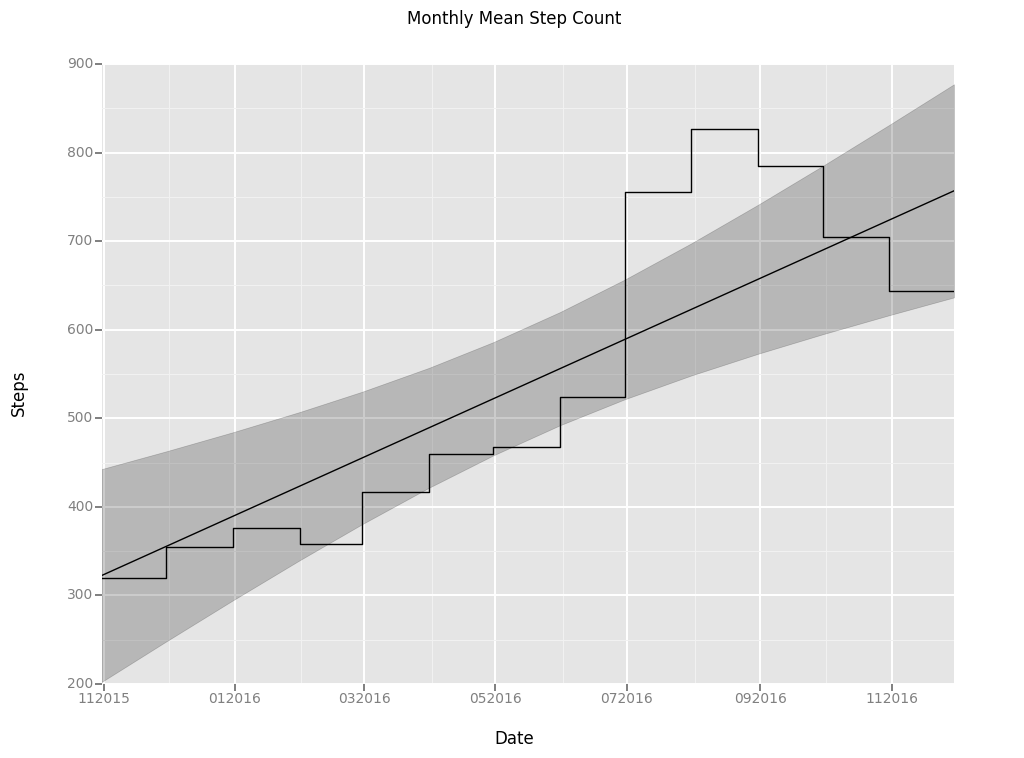

<ggplot: (-9223372036568367521)>


In [41]:
# plot mean monthly steps
m_p = ggplot(df_monthly, aes(x='__index__', y='step_mean')) + \
        geom_step() + \
        stat_smooth() + \
        scale_x_date(labels='%m%Y') + \
        ggtitle('Monthly Mean Step Count') + \
        xlab('Date') + \
        ylab('Steps')

print(m_p)

In [51]:
def weekendBool(d):
    if d not in ['Saturday', 'Sunday']:
        return False
    else:
        return True

df_daily['weekday'] = df_daily.index.weekday
df_daily['weekday_name'] = df_daily.index.weekday_name
df_daily['weekend'] = df_daily.weekday_name.apply(weekendBool)
df_daily.head()

,steps,step_mean,weekday,weekday_name,weekend
start_time,,,,,
2015-10-23,4165,694.166667,4,Friday,False
2015-10-24,8314,346.416667,5,Saturday,True
2015-10-25,2747,114.458333,6,Sunday,True
2015-10-26,6472,269.666667,0,Monday,False
2015-10-27,4946,206.083333,1,Tuesday,False


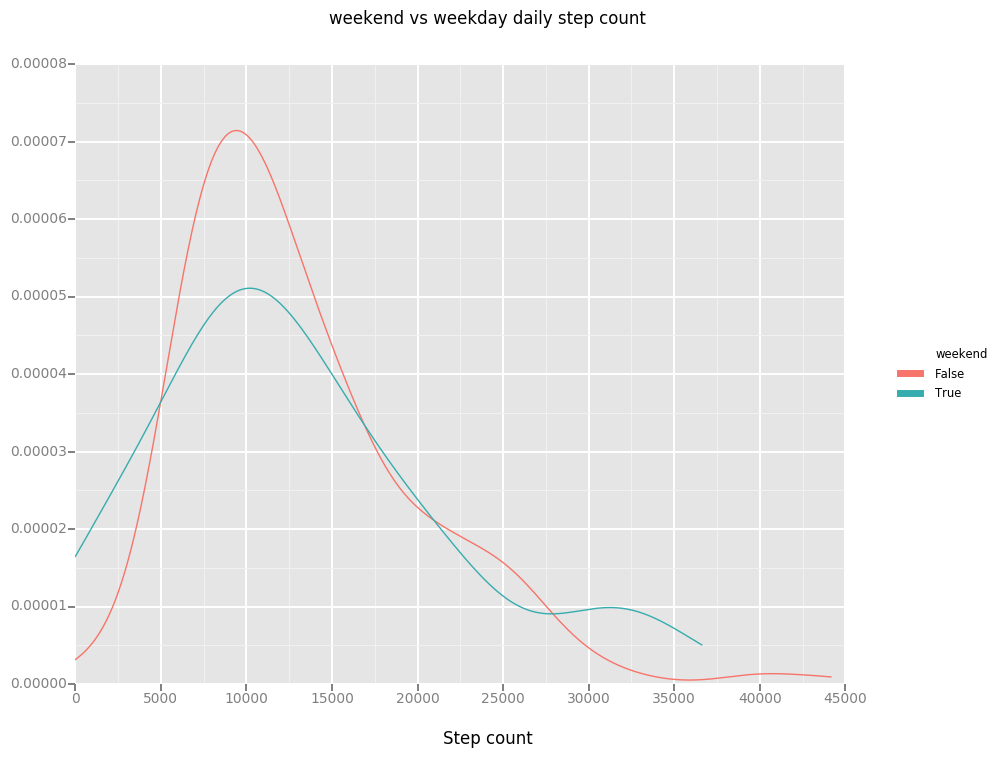

<ggplot: (-9223372036562907290)>

In [55]:
# plot day of week stat density
ggplot(aes(x='steps', color='weekend'), data=df_daily) + \
    stat_density() + \
    ggtitle('weekend vs weekday daily step count') + \
    xlab('Step count')
    

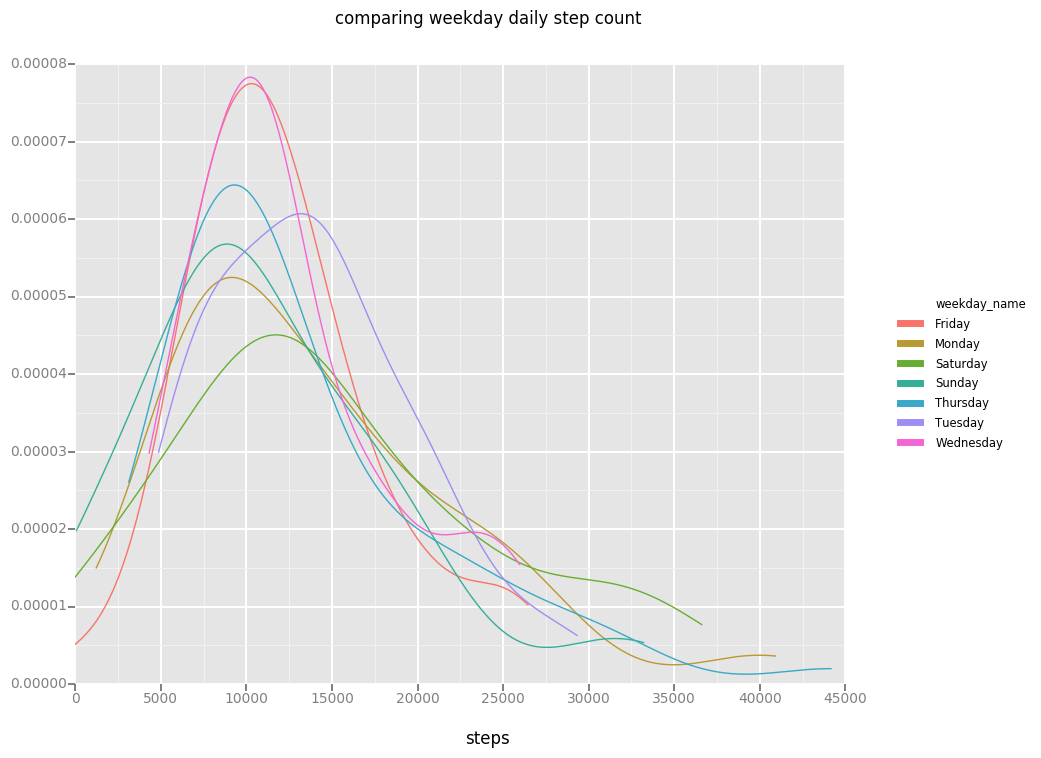

<ggplot: (294069196)>

In [56]:
# plot stat density by each day
ggplot(aes(x='steps', color='weekday_name'), data=df_daily) + \
    stat_density() + \
    ggtitle('comparing weekday daily step count') + \
    xlab('steps')

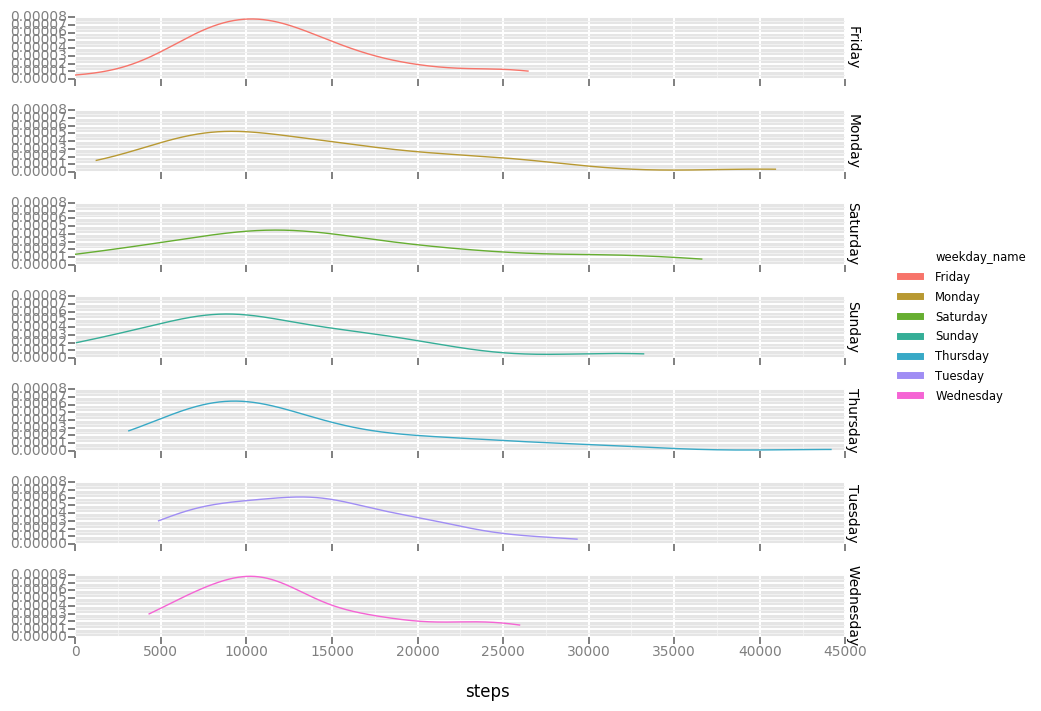

<ggplot: (289033911)>

In [57]:
# split up the days and plot stat density
ggplot(df_daily, aes(x='steps', color='weekday_name')) + \
    stat_density() + \
    facet_grid('weekday_name')

In [63]:
weekday_grouped = df_daily.groupby('weekday_name')
weekday_grouped.describe()

step_mean         steps  weekday
weekday_name                                          
Friday       count    57.000000     57.000000     57.0
             mean    514.498538  12128.754386      4.0
             std     228.806275   5565.044578      0.0
             min       0.000000      0.000000      4.0
             25%     343.750000   8067.000000      4.0
             50%     472.583333  11240.000000      4.0
             75%     617.375000  14793.000000      4.0
             max    1102.291667  26455.000000      4.0
Monday       count    56.000000     56.000000     56.0
             mean    585.523810  14052.571429      0.0
             std     351.094605   8426.270528      0.0
             min      51.041667   1225.000000      0.0
             25%     317.281250   7614.750000      0.0
             50%     517.479167  12419.500000      0.0
             75%     744.052083  17857.250000      0.0
             max    1704.666667  40912.000000      0.0
Saturday     count    57.000000     57.000000     57.0
             mean    625.634702  15015.087719      5.0
             std     386.208012   9269.231416      0.0
             min       0.000000      0.000000      5.0
             25%     376.958333   9047.000000      5.0
             50%     530.125000  12723.000000      5.0
             75%     870.000000  20880.000000      5.0
             max    1526.791667  36643.000000      5.0
Sunday       count    56.000000     56.000000     56.0
             mean    474.038562  11376.089286      6.0
             std     310.475794   7447.484696      0.0
             min       2.916667     70.000000      6.0
             25%     268.520833   6444.500000      6.0
             50%     407.403080   9578.000000      6.0
             75%     641.614583  15398.750000      6.0
             max    1385.125000  33243.000000      6.0
Thursday     count    56.000000     56.000000     56.0
             mean    556.337798  13352.107143      3.0
             std     337.613971   8102.735295      0.0
             min     130.208333   3125.000000      3.0
             25%     338.437500   8122.500000      3.0
             50%     423.187500  10156.500000      3.0
             75%     662.000000  15888.000000      3.0
             max    1841.708333  44201.000000      3.0
Tuesday      count    56.000000     56.000000     56.0
             mean    576.732143  13841.571429      1.0
             std     246.627692   5919.064609      0.0
             min     202.750000   4866.000000      1.0
             25%     380.718750   9137.250000      1.0
             50%     571.250000  13710.000000      1.0
             75%     719.072917  17257.750000      1.0
             max    1222.666667  29344.000000      1.0
Wednesday    count    56.000000     56.000000     56.0
             mean    526.777530  12642.660714      2.0
             std     242.275411   5814.609867      0.0
             min     179.708333   4313.000000      2.0
             25%     365.145833   8763.500000      2.0
             50%     452.229167  10853.500000      2.0
             75%     679.750000  16314.000000      2.0
             max    1082.625000  25983.000000      2.0

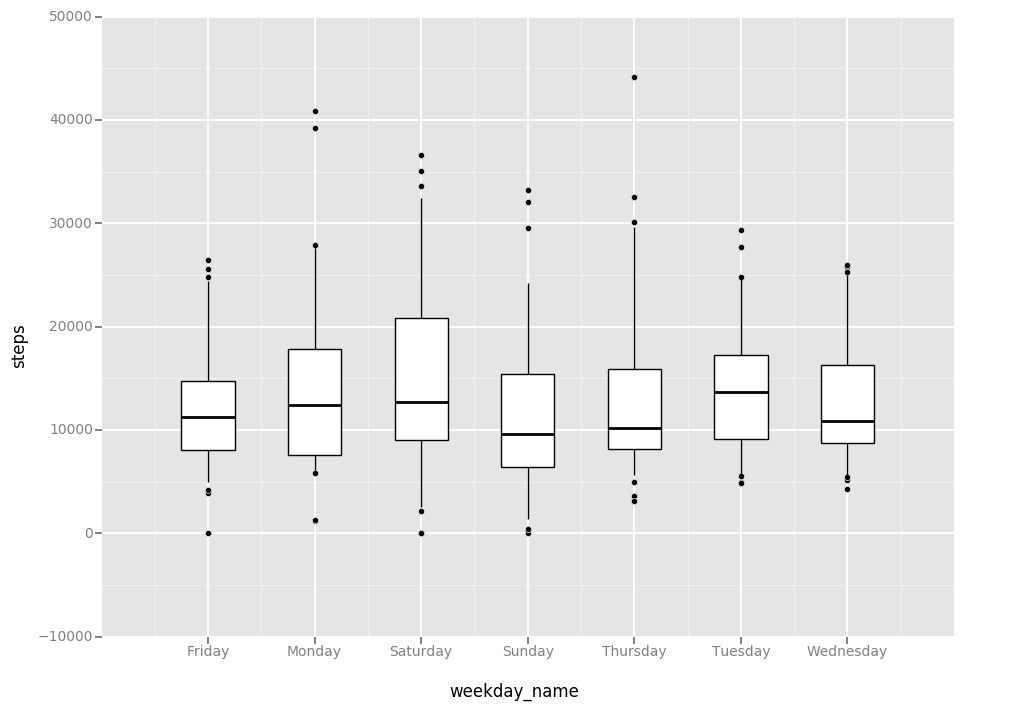

<ggplot: (297662314)>

In [75]:
df_daily.sort_values('weekday_name', inplace=True)
# x cord mapping is not overwritable
ggplot(df_daily, aes(x='weekday_name', y='steps')) + geom_boxplot()